# tâche 6

pip install pymatgen --ignore-installed ruamel.yaml

In [14]:

from pymatgen.ext.matproj import MPRester
from pymatgen.core.operations import SymmOp
from IPython.display import Image
from IPython.display import Math
from IPython.display import Latex

with MPRester ("5WSgGixxkDsJiqQXzr") as m:
    
    #Création de la structure du cristal à partir du MP
    structure = m.get_structure_by_material_id("mp-9437")

/opt/anaconda3/lib/python3.8/site-packages/pymatgen/ext/matproj.py:186: UserWarning: You are using the legacy MPRester. This version of the MPRester will no longer be updated. To access the latest data with the new MPRester, obtain a new API key from https://materialsproject.org/api and consult the docs at https://docs.materialsproject.org/ for more information.
  warnings.warn(


In [4]:
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.core.operations import SymmOp

#Création d'un objet SpaceGroupAnalyzer
SA = SpacegroupAnalyzer(structure)

#Création d'une structure conventionnelle pour dégager le plus de symétries possible
new_s = SA.get_conventional_standard_structure()

#Création d'un nouvel objet SpaceGroupAnalyzer lié à la structure'new_s'
SP = SpacegroupAnalyzer(new_s)

#Création des sites des atomes du cristal pour pouvoir accéder aux coordonnées de chacun
site = new_s.sites
print(site)


[PeriodicSite: Nb (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000], PeriodicSite: Nb (-0.0000, 2.9845, 2.9845) [0.0000, 0.5000, 0.5000], PeriodicSite: Nb (2.9845, 0.0000, 2.9845) [0.5000, 0.0000, 0.5000], PeriodicSite: Nb (2.9845, 2.9845, 0.0000) [0.5000, 0.5000, 0.0000], PeriodicSite: Fe (1.4922, 1.4922, 4.4767) [0.2500, 0.2500, 0.7500], PeriodicSite: Fe (1.4922, 4.4767, 1.4922) [0.2500, 0.7500, 0.2500], PeriodicSite: Fe (4.4767, 1.4922, 1.4922) [0.7500, 0.2500, 0.2500], PeriodicSite: Fe (4.4767, 4.4767, 4.4767) [0.7500, 0.7500, 0.7500], PeriodicSite: Sb (2.9845, 0.0000, 0.0000) [0.5000, 0.0000, 0.0000], PeriodicSite: Sb (2.9845, 2.9845, 2.9845) [0.5000, 0.5000, 0.5000], PeriodicSite: Sb (0.0000, 0.0000, 2.9845) [0.0000, 0.0000, 0.5000], PeriodicSite: Sb (-0.0000, 2.9845, 0.0000) [0.0000, 0.5000, 0.0000]]


In [6]:
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.core.operations import SymmOp

#Création d'un objet SpaceGroupAnalyzer
SA = SpacegroupAnalyzer(structure)


#Création d'une structure conventionnelle pour dégager le plus de symétries possible
new_s = SA.get_conventional_standard_structure()
print(new_s)

#Création d'un nouvel objet SpaceGroupAnalyzer lié à la structure'new_s'
SP = SpacegroupAnalyzer(new_s)

#Création des sites des atomes du cristal pour pouvoir accéder aux coordonnées de chacun
site = new_s.sites
print(site)

Full Formula (Nb4 Fe4 Sb4)
Reduced Formula: NbFeSb
abc   :   5.968992   5.968992   5.968992
angles:  90.000000  90.000000  90.000000
pbc   :       True       True       True
Sites (12)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  Nb    0     0     0
  1  Nb    0     0.5   0.5
  2  Nb    0.5   0     0.5
  3  Nb    0.5   0.5   0
  4  Fe    0.25  0.25  0.75
  5  Fe    0.25  0.75  0.25
  6  Fe    0.75  0.25  0.25
  7  Fe    0.75  0.75  0.75
  8  Sb    0.5   0     0
  9  Sb    0.5   0.5   0.5
 10  Sb    0     0     0.5
 11  Sb    0     0.5   0
[PeriodicSite: Nb (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000], PeriodicSite: Nb (-0.0000, 2.9845, 2.9845) [0.0000, 0.5000, 0.5000], PeriodicSite: Nb (2.9845, 0.0000, 2.9845) [0.5000, 0.0000, 0.5000], PeriodicSite: Nb (2.9845, 2.9845, 0.0000) [0.5000, 0.5000, 0.0000], PeriodicSite: Fe (1.4922, 1.4922, 4.4767) [0.2500, 0.2500, 0.7500], PeriodicSite: Fe (1.4922, 4.4767, 1.4922) [0.2500, 0.7500, 0.2500], PeriodicSite: Fe (4.4767, 1.4

Dans cette partie, nous allons analyser l'effet de 3 symétries différentes sur les atomes de notre cristal.

Rappelons d'abord qu'il existe différentes symétries ponctuelles (i.e. des opérations telles qu'au moins un point de la cellule n'est pas affecté par celles-ci) auxquelles sont associés des éléments de symétrie ansi que des opérateurs. Ces derniers sont représentés par des matrices orthogonales permettant d'exprimer les coordonnées cartésiennes d'un point et de son image.

Dans tout cet exercice, nous utiliserons la maille conventionnelle pour pouvoir faire apparaître toutes les symétries possibles. Les positions seront quant à elles exprimées en coordonnées réduites, obtenues en divisant les coordonnées absolues par les normes des vecteurs de base a,b et c.

La structure cristalline étudié est le NbFesb, qui possède 96 éléments de symétrie différents. Par la suite, nous étudierons 3 de ces élements sur 1 atome différent chacun.

 # 1) symétrie 1 : Réflexion <h1>

Matrice de rotation associée :
[[ 0. -1.  0.]
 [-1.  0.  0.]
 [ 0.  0.  1.]]
Vecteur de translation associé :
[0. 0. 0.]
Application de la réflexion à l'atome de Nb (#2) situé en (x,y,z) = (0.00,0.00,0.00) :
[0. 0. 0.]


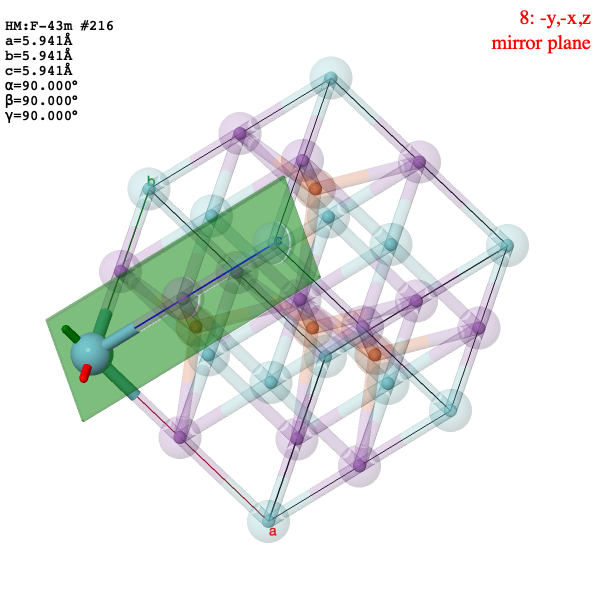

In [16]:
########Réflexion########
S1 = SymmOp.from_xyz_string('-y,-x,z')

#Position initiale de l'atome Nb 
NBI = site[1].frac_coords
#Position après opération de symétrie de l'atome Nb (atome 1)
NBF = S1.operate(NBI)
print("Matrice de rotation associée :")
print(S1.rotation_matrix)
print("Vecteur de translation associé :")
print(S1.translation_vector)
print("Application de la réflexion à l'atome de Nb (#2) situé en (x,y,z) = (0.00,0.00,0.00) :")
print(S1.operate((0.00,0.00,0.00)))
Image("PM.jpeg")


__Description :__

La réflexion est une opération qui inverse la chiralité et dont le déterminant de l'opérateur vaut -1. On observe que l'atome garde la même coordonnée en z. 

__Equation :__

$$\begin{pmatrix}  0 & -1 & 0 \\ -1 & 0 & 0 \\ 0 & 0 & 1 \end{pmatrix} 
\begin{pmatrix}  
x \\ 
y \\ 
z
\end{pmatrix} = 
\begin{pmatrix} 
-y \\ 
-x \\ 
z 
\end{pmatrix}$$

L'atome Nb passe de la position $\begin{bmatrix} 0.00000000 & 0.00000000 & 0.00000000 \end{bmatrix}$ à la position $\begin{bmatrix} 0.00000000 & 0.00000000 & 0.00000000 \end{bmatrix}$.

# 2) symétrie 2 : Rotation d'ordre 2 <h1>

Matrice de rotation associée :
[[-1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0. -1.]]
Vecteur de translation associé :
[0. 0. 0.]
Application de l'axe de rotation C2 à l'atome de Fe (#2) situé en (x,y,z) = (0.25,0.25,0.25) :
[-0.25  0.25 -0.25]


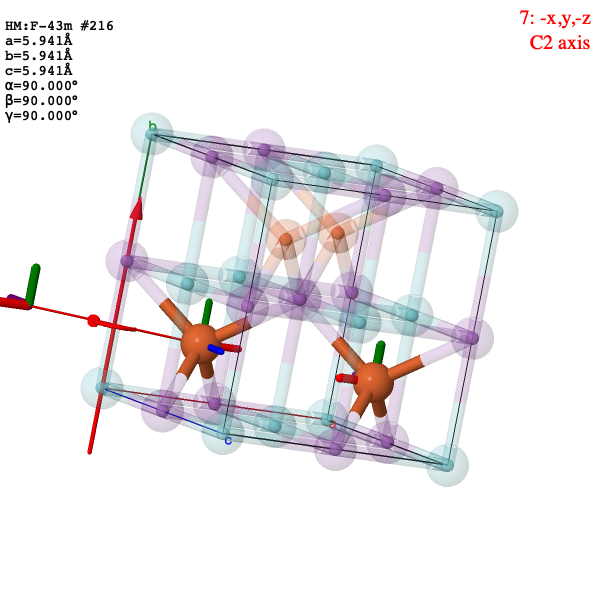

In [19]:
########Rotation d'ordre 2########
S2 = SymmOp.from_xyz_string('-x,y,-z')

print("Matrice de rotation associée :")
print(S2.rotation_matrix)
print("Vecteur de translation associé :")
print(S2.translation_vector)
print("Application de l'axe de rotation C2 à l'atome de Fe (#2) situé en (x,y,z) = (0.25,0.25,0.25) :")
print(S2.operate((0.25,0.25,0.25)))
Image("rotation.jpeg")

__Description :__

La rotation est une opération consistant en la rotation de l'atome autour de l'axe de rotation (ici le vecteur a) d'un angle $\pi$. Elle conserve la chiralité et le déterminant de l'opérateur vaut 1. 

__Equation :__

$$\begin{pmatrix}  -1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & -1 \end{pmatrix} 
\begin{pmatrix}  
x \\ 
y \\ 
z 
\end{pmatrix} = 
\begin{pmatrix} 
-x \\ 
y \\ 
-z 
\end{pmatrix}$$

L'atome Fe passe de la position $\begin{bmatrix} 0.25000000 & 0.25000000 & 0.25000000 \end{bmatrix}$ à la position $\begin{bmatrix}  -0.25000000 & 0.25000000 & -0.25000000 \end{bmatrix}$.

# 3) symétrie 3 : Rotation hélicoïdale d'ordre 3 <h1>

Matrice de rotation associée :
[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
Vecteur de translation associé :
[0.5 0.5 0. ]
Application de la Rotation hélicoïdale d'ordre 3 l'atome de Sb (#10) situé en (x,y,z) = (0.50,0.50,0.50) :
[1.  1.  0.5]


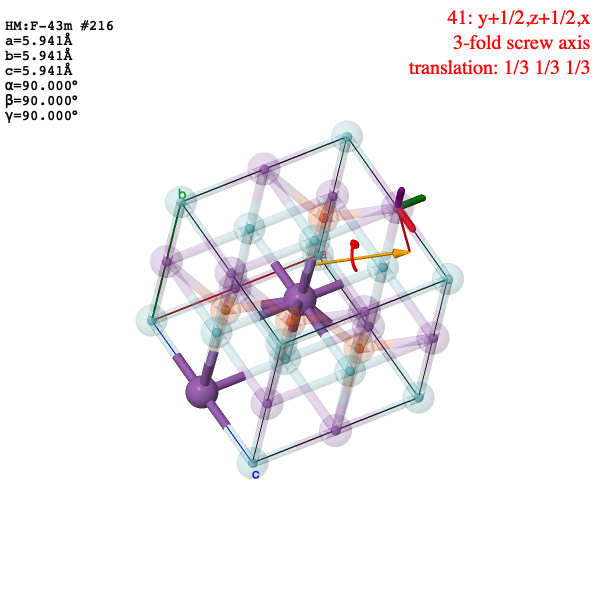

In [21]:
########Rotation hélicoïdale d'ordre 3########
S3 = SymmOp.from_xyz_string('y+1/2,z+1/2,x')
print("Matrice de rotation associée :")
print(S3.rotation_matrix)
print("Vecteur de translation associé :")
print(S3.translation_vector)
print("Application de la Rotation hélicoïdale d'ordre 3 l'atome de Sb (#10) situé en (x,y,z) = (0.50,0.50,0.50) :")
print(S3.operate((0.50,0.50,0.50)))
Image("S3.jpg")

__Description :__

La rotation hélicoïdale est une opération non-symmorphique car elle possède une composante de translation. La molécule subit une rotation de $\frac{2\pi}{3}$ dans le sens anti-horlogique autour de l'axe hélicoïdal (sur l'image en orange), suivie d'une translation parallèle à l'axe hélicoïdal d'une valeur de $\frac{1}{2}$.

__Equation :__ 

$$\begin{pmatrix}  0 & 1 & 0 \\ 0 & 0 & 1 \\ 1 & 0 & 0 \end{pmatrix} 
\begin{pmatrix}  
x \\ 
y \\ 
z 
\end{pmatrix} + 
\begin{pmatrix}  
1/2 \\ 
1/2 \\ 
0.00 
\end{pmatrix} = 
\begin{pmatrix} 
y+1/2 \\ 
z+1/2 \\ 
x
\end{pmatrix}$$

L'atome Sb passe de la position $\begin{bmatrix} 0.50000000 & 0.50000000 & 0.50000000 \end{bmatrix}$ à la position $\begin{bmatrix}  1.00000000  & 1.00000000  & 0.50000000 \end{bmatrix}$.